# Biol 359  |  Cross-Validation
### Spring 2021, Week 9

<hr style="border:2px solid gray"> </hr>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")


/Users/neda.bagheri/Library/Python/3.7/lib/python/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/neda.bagheri/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for 

In [3]:
# Load diabetes dataset
diabetes_dataset = datasets.load_diabetes()
#print(diabetes_dataset.DESCR)

In [9]:
diabetes_dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [20]:
# Load microarray dataset

dataset = pd.read_csv('microarray_data_clean2.csv')
# dataset.head(10)

# dataset['Cell Viability in Comparison to Media Alone (24 Hr)']

dataset

input_data = dataset.iloc[:, 4:]
input_data
output_data = dataset.iloc[:, 3]
output_data


0     1.0000
1     0.3509
2     0.3300
3     0.9196
4     1.1047
5     0.7016
6     0.7885
7     1.0000
8     0.3288
9     0.9727
10    0.1514
11    0.2811
12    1.0000
13    0.3288
14    0.3024
15    0.1225
16    0.0248
17    1.0000
18    0.3752
19    0.0360
20    0.5821
21    1.0000
22    0.2936
23    0.2635
24    0.1526
25    0.0450
26    1.0000
27    0.2936
28    0.3169
29    0.4429
30    0.3012
Name: Cell Viability in Comparison to Media Alone (24 Hr), dtype: float64

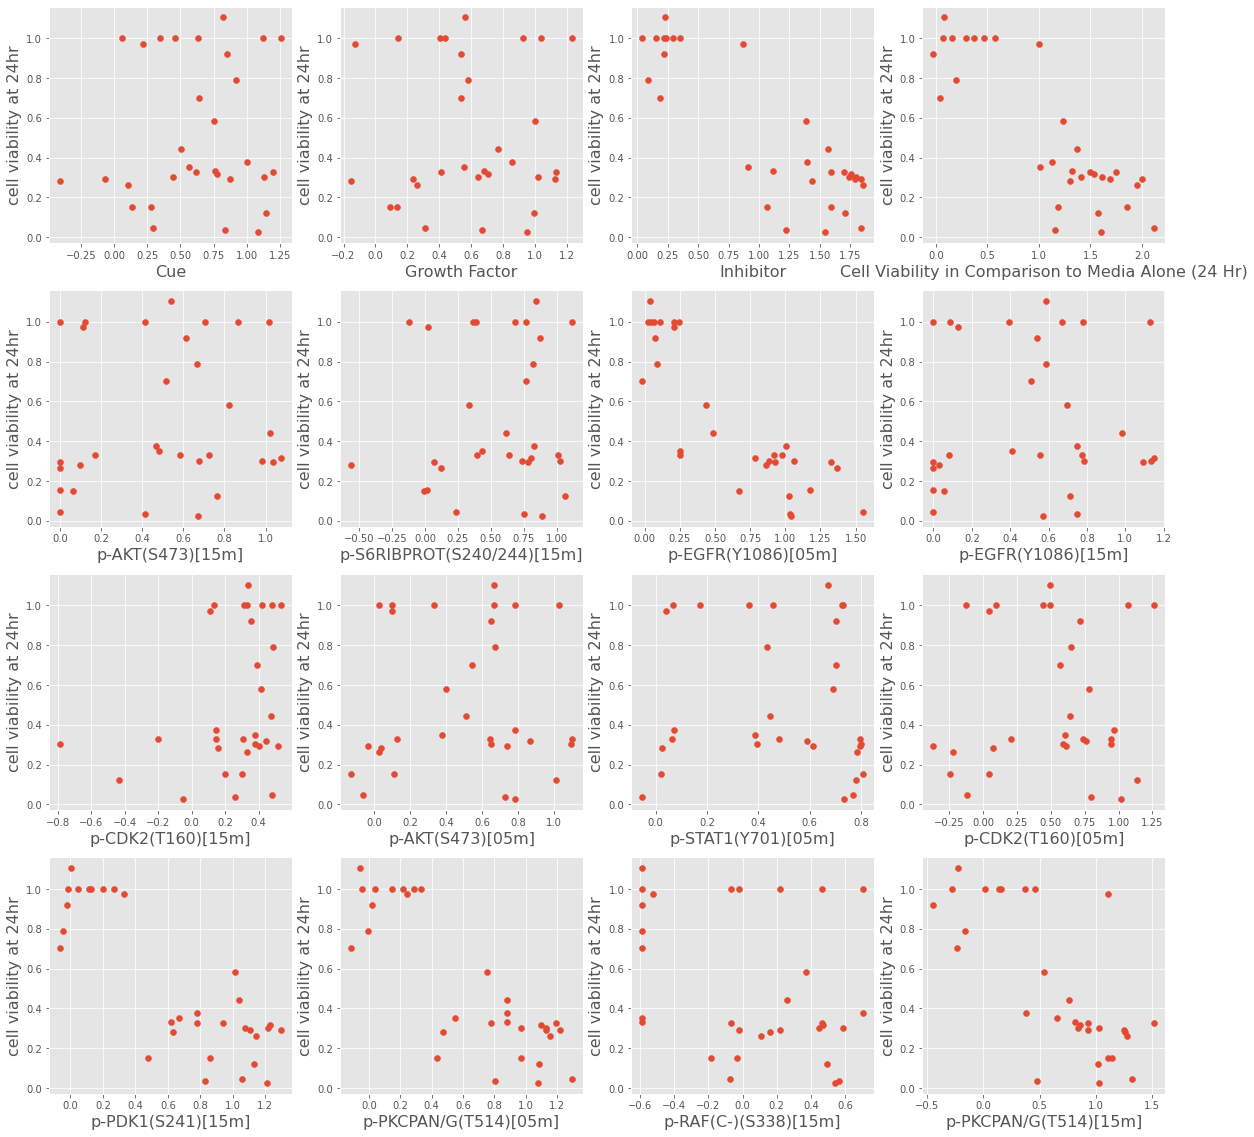

In [22]:
# Generate scatter plot of independent vs dependent variable
#plt.style.use('ggplot')
#fig = plt.figure(figsize = (20, 20))
 
#for index, feature_name in enumerate(diabetes_dataset.feature_names):
#    ax = fig.add_subplot(4, 4, index + 1)
#    ax.scatter(diabetes_dataset.data[:, index], diabetes_dataset.target)
#    ax.set_ylabel('progression after 1yr', size = 16)
#    ax.set_xlabel(feature_name, size = 16)
 
#plt.show()

# Generate scatter plot of independent vs dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (20, 20))
 
for index, feature_name in enumerate(dataset.columns):
    if index >= 16:
        break
    ax = fig.add_subplot(4, 4, index + 1)
    ax.scatter(input_data.iloc[:, index], output_data) 
    ax.set_ylabel('cell viability at 24hr', size = 16)
    ax.set_xlabel(feature_name, size = 16)
 
plt.show()

In [23]:
# Load the dataset into Pandas Dataframe, omitting the feature=sex
# diabetes_pd = pd.DataFrame(diabetes_dataset.data)
# diabetes_pd.columns = diabetes_dataset.feature_names
# diabetes_pd_target = np.asarray(diabetes_dataset.target)
# diabetes_pd['progression'] = pd.Series(diabetes_pd_target)
 
# Define input data
# X = diabetes_pd.iloc[:, :-1]
# X = diabetes_pd.loc[:, ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]

# Define output data
# Y = diabetes_pd.iloc[:, -1]
 
# print(diabetes_pd.head())

X = input_data
Y = output_data

print("Input data:")
print(round(X,4))

print("")
print("Output data:")
print(round(Y,2))

Input data:
    p-AKT(S473)[15m]  p-S6RIBPROT(S240/244)[15m]  p-EGFR(Y1086)[05m]  \
0             0.4579                      0.4337              0.2191   
1             0.5622                      0.5574              0.9131   
2             0.7634                      0.6791              1.1132   
3             0.8478                      0.5387              0.2182   
4             0.8241                      0.5588              0.2269   
5             0.6406                      0.5353              0.1853   
6             0.9168                      0.5827              0.0860   
7             0.3453                      0.4025              0.0407   
8             0.6146                      0.4128              1.5909   
9             0.2151                     -0.1269              0.8671   
10            0.2812                      0.0935              1.0671   
11           -0.4069                     -0.1516              1.4352   
12            1.2559                      1.2304    

In [24]:
# Split data into training and validation set
x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size = 0.25)
 
print("Shape of training data X = % s and Y = % s : "%(x_train.shape, y_train.shape)) 
print("Shape of validation data X = % s and Y = % s : "%(x_validation.shape, y_validation.shape))

Shape of training data X = (23, 180) and Y = (23,) : 
Shape of validation data X = (8, 180) and Y = (8,) : 


### (1) Multiple Linear Regression (Ordinary Least Squares)

In [25]:
# Train multiple linear regression model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Predict validation data
lreg_y_pred = lreg.predict(x_validation)

print("Linear regression coefficient of determination of prediction for training data")
print(f"{lreg.score(x_train, y_train):.3f}" "\n")

print("Linear regression coefficient of determination of prediction for validation data")
print(f"{lreg.score(x_validation, y_validation):.3f}" "\n")

mean_squared_error = round(np.mean((lreg_y_pred - y_validation)**2),3)
print("Mean squared Error on test set : ", mean_squared_error)
 

Linear regression coefficient of determination of prediction for training data
1.000

Linear regression coefficient of determination of prediction for validation data
0.272

Mean squared Error on test set :  0.077


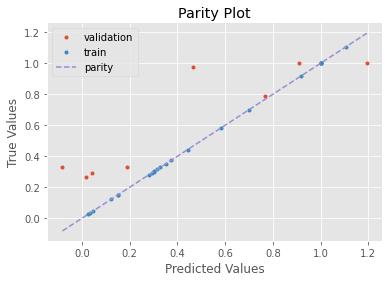

In [26]:
# Parity plot

plt.plot(lreg_y_pred, y_validation, '.', label='validation')
plt.plot(lreg.predict(x_train), y_train, '.', label='train')

min_value = min(min(lreg_y_pred), min(y_validation), min(lreg.predict(x_train)), min(y_train))
max_value = max(max(lreg_y_pred), max(y_validation), max(lreg.predict(x_train)), max(y_train))
plt.plot([min_value, max_value],[min_value, max_value], '--', label="parity")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
ax.set_box_aspect(1)
sns.despine()
plt.title('Parity Plot')
plt.legend(loc='best')
plt.show()


In [27]:
# Combine coefficient and corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
lreg_coefficient

,Columns,Coefficient Estimate
0,p-AKT(S473)[15m],-0.087169
1,p-S6RIBPROT(S240/244)[15m],0.063178
2,p-EGFR(Y1086)[05m],0.022714
3,p-EGFR(Y1086)[15m],-0.191191
4,p-CDK2(T160)[15m],0.030541
...,...,...
175,p-STAT5(Y694)[15m],0.010791
176,p-CDC2(Y15)[15m],0.089406
177,p-CREB(S133)[15m],0.020892
178,p-PI3KP85(Y458)P55(Y199)[05m],0.027944


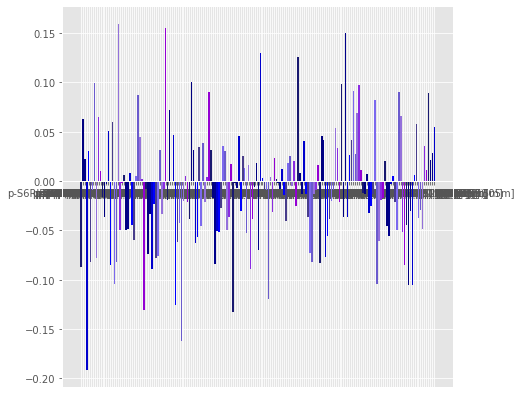

In [28]:
# Plot the magnitude of coefficients
fig, ax = plt.subplots(figsize =(7, 7))
color =['midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 
        'darkslateblue','mediumslateblue', 'slateblue', 
        'mediumpurple', 'blueviolet', 'darkviolet']

ax.bar(lreg_coefficient["Columns"], lreg_coefficient['Coefficient Estimate'], color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

### (2) Ridge Regression 

In [29]:
# Train a Ridge regression model
from sklearn.linear_model import Ridge
 
ridgeR = Ridge(alpha = 0.2)
ridgeR.fit(x_train, y_train)

# Predict validation data
ridge_y_pred = ridgeR.predict(x_validation)
 
print("Ridge regression R2 (training data)")
print(f"{ridgeR.score(x_train, y_train):.3f}" "\n")

print("Ridge regression Q2 (validation data)")
print(f"{ridgeR.score(x_validation, y_validation):.3f}" "\n")

mean_squared_error = round(np.mean((ridge_y_pred - y_validation)**2),3)
print("Mean squared Error on test set : ", mean_squared_error)
    


Ridge regression R2 (training data)
0.992

Ridge regression Q2 (validation data)
0.388

Mean squared Error on test set :  0.065


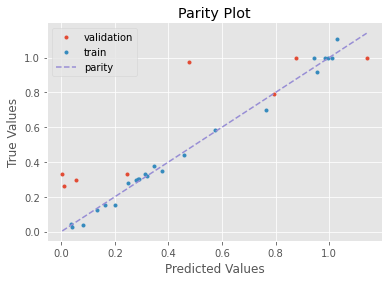

In [30]:
# Parity plot

plt.plot(ridgeR.predict(x_validation), y_validation, '.', label='validation')
plt.plot(ridgeR.predict(x_train), y_train, '.', label='train')

min_value = min(min(ridgeR.predict(x_validation)), min(y_validation), min(ridgeR.predict(x_train)), min(y_train))
max_value = max(max(ridgeR.predict(x_validation)), max(y_validation), max(ridgeR.predict(x_train)), max(y_train))
plt.plot([min_value, max_value],[min_value, max_value], '--', label="parity")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
ax.set_box_aspect(1)
sns.despine()
plt.title('Parity Plot')
plt.legend(loc='best')
plt.show()


In [31]:
# Combine coefficient and corresponding variable names
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
ridge_coefficient

,Columns,Coefficient Estimate
0,p-AKT(S473)[15m],-0.036525
1,p-S6RIBPROT(S240/244)[15m],0.067584
2,p-EGFR(Y1086)[05m],0.005154
3,p-EGFR(Y1086)[15m],-0.117722
4,p-CDK2(T160)[15m],0.033064
...,...,...
175,p-STAT5(Y694)[15m],0.027302
176,p-CDC2(Y15)[15m],0.055975
177,p-CREB(S133)[15m],-0.000782
178,p-PI3KP85(Y458)P55(Y199)[05m],0.017537


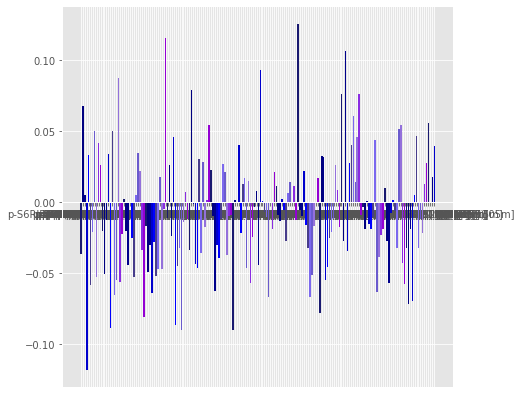

In [32]:
# Plot the magnitude of coefficients
fig, ax = plt.subplots(figsize =(7, 7))
color =['midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 
        'darkslateblue','mediumslateblue', 'slateblue', 
        'mediumpurple', 'blueviolet', 'darkviolet']

ax.bar(ridge_coefficient["Columns"], ridge_coefficient['Coefficient Estimate'], color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

### (3) LASSO Regression 

In [33]:
# Train a LASSO regression model
from sklearn.linear_model import Lasso
 
lasso = Lasso(alpha = 0.2)
lasso.fit(x_train, y_train)

# Predict validation data
lasso_y_pred = lasso.predict(x_validation)
 
print("LASSO regression R2 (training data)")
print(f"{lasso.score(x_train, y_train):.3f}" "\n")

print("LASSO regression Q2 (validation data)")
print(f"{lasso.score(x_validation, y_validation):.3f}" "\n")

mean_squared_error = round(np.mean((lasso_y_pred - y_validation)**2),3)
print("Mean squared Error on test set : ", mean_squared_error)

LASSO regression R2 (training data)
0.023

LASSO regression Q2 (validation data)
-0.192

Mean squared Error on test set :  0.126


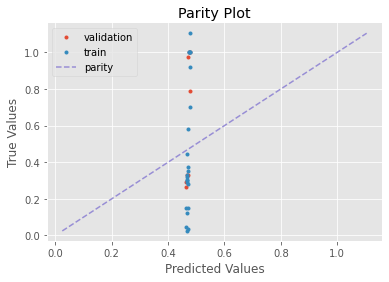

In [34]:
# Parity plot

plt.plot(lasso.predict(x_validation), y_validation, '.', label='validation')
plt.plot(lasso.predict(x_train), y_train, '.', label='train')

min_value = min(min(lasso.predict(x_validation)), min(y_validation), min(lasso.predict(x_train)), min(y_train))
max_value = max(max(lasso.predict(x_validation)), max(y_validation), max(lasso.predict(x_train)), max(y_train))
plt.plot([min_value, max_value],[min_value, max_value], '--', label="parity")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
ax.set_box_aspect(1)
sns.despine()
plt.title('Parity Plot')
plt.legend(loc='best')
plt.show()


In [35]:
# Combine coefficient and corresponding variable names
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
lasso_coeff

,Columns,Coefficient Estimate
0,p-AKT(S473)[15m],0.000000
1,p-S6RIBPROT(S240/244)[15m],0.000000
2,p-EGFR(Y1086)[05m],-0.000000
3,p-EGFR(Y1086)[15m],-0.007002
4,p-CDK2(T160)[15m],0.000000
...,...,...
175,p-STAT5(Y694)[15m],-0.000000
176,p-CDC2(Y15)[15m],-0.000000
177,p-CREB(S133)[15m],-0.000000
178,p-PI3KP85(Y458)P55(Y199)[05m],-0.000000


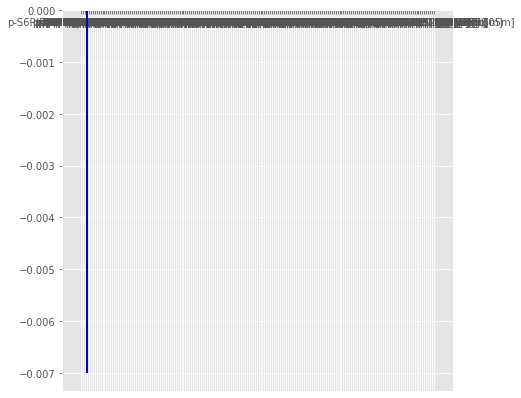

In [36]:
# Plot the magnitude of coefficients
fig, ax = plt.subplots(figsize =(7, 7))
color =['midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 
        'darkslateblue','mediumslateblue', 'slateblue', 
        'mediumpurple', 'blueviolet', 'darkviolet']

ax.bar(lasso_coeff["Columns"], lasso_coeff['Coefficient Estimate'], color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

### (4) Elastic Net Regression 

In [37]:
# Train and Elastic Net model
from sklearn.linear_model import ElasticNet
 
e_net = ElasticNet(alpha = 0.2)
e_net.fit(x_train, y_train)
 
# Predict validation data
elastic_y_pred = e_net.predict(x_validation)

print("Elastic Net regression R2 (training data)")
print(f"{e_net.score(x_train, y_train):.3f}" "\n")

print("Elastic Net regression Q2 (validation data)")
print(f"{e_net.score(x_validation, y_validation):.3f}" "\n")

mean_squared_error = round(np.mean((elastic_y_pred - y_validation)**2),3)
print("Mean squared Error on test set : ", mean_squared_error)


Elastic Net regression R2 (training data)
0.544

Elastic Net regression Q2 (validation data)
0.385

Mean squared Error on test set :  0.065


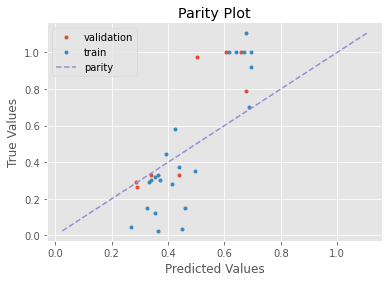

In [38]:
# Parity plot

plt.plot(e_net.predict(x_validation), y_validation, '.', label='validation')
plt.plot(e_net.predict(x_train), y_train, '.', label='train')

min_value = min(min(e_net.predict(x_validation)), min(y_validation), min(e_net.predict(x_train)), min(y_train))
max_value = max(max(e_net.predict(x_validation)), max(y_validation), max(e_net.predict(x_train)), max(y_train))
plt.plot([min_value, max_value],[min_value, max_value], '--', label="parity")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
ax.set_box_aspect(1)
sns.despine()
plt.title('Parity Plot')
plt.legend(loc='best')
plt.show()


In [39]:
# Combine coefficient and corresponding variable names
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

,Columns,Coefficient Estimate
0,p-AKT(S473)[15m],0.000000
1,p-S6RIBPROT(S240/244)[15m],0.000000
2,p-EGFR(Y1086)[05m],-0.085346
3,p-EGFR(Y1086)[15m],-0.132550
4,p-CDK2(T160)[15m],0.000000
...,...,...
175,p-STAT5(Y694)[15m],-0.000000
176,p-CDC2(Y15)[15m],-0.000000
177,p-CREB(S133)[15m],-0.000000
178,p-PI3KP85(Y458)P55(Y199)[05m],-0.000000


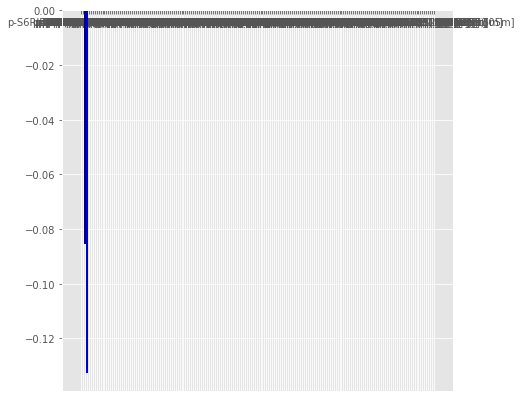

In [40]:
# Plot the magnitude of coefficients
fig, ax = plt.subplots(figsize =(7, 7))
color =['midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 
        'darkslateblue','mediumslateblue', 'slateblue', 
        'mediumpurple', 'blueviolet', 'darkviolet']

ax.bar(e_net_coeff["Columns"], e_net_coeff['Coefficient Estimate'], color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

### (5) Compare model architectures

In [41]:
from sklearn.model_selection import cross_val_score
k = 5
reg_alpha = 0.2

lm_en = linear_model.ElasticNet(alpha=reg_alpha)
scores_en = cross_val_score(lm_en, X, Y, cv=k)
np.mean(scores_en)
print("Elastic Net cross-validation Q2")
print(f"{np.mean(scores_en):.3f}" "\n")

lm_lasso = linear_model.Lasso(alpha=reg_alpha)
scores_lasso = cross_val_score(lm_lasso, X, Y, cv=k)
np.mean(scores_lasso)
print("LASSO cross-validation Q2")
print(f"{np.mean(scores_lasso):.3f}" "\n")

lm_ridge = linear_model.Ridge(alpha=reg_alpha)
scores_ridge = cross_val_score(lm_ridge, X, Y, cv=k)
np.mean(scores_ridge)
print("Ridge cross-validation Q2")
print(f"{np.mean(scores_ridge):.3f}" "\n")

Elastic Net cross-validation Q2
0.347

LASSO cross-validation Q2
-0.390

Ridge cross-validation Q2
0.398



### (6) Observe impact of regularization strength 

In [42]:
for alpha in [0,0.02,0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8]:
    lm_ridge = linear_model.Ridge(alpha=alpha)
    scores_ridge = cross_val_score(lm_ridge, X, Y, cv=k)
    mean_ridge = round(np.mean(scores_ridge),2)
    print(f"Alpha={alpha} results in average Ridge Q2={mean_ridge}")

Alpha=0 results in average Ridge Q2=0.26
Alpha=0.02 results in average Ridge Q2=0.29
Alpha=0.04 results in average Ridge Q2=0.3
Alpha=0.06 results in average Ridge Q2=0.32
Alpha=0.08 results in average Ridge Q2=0.34
Alpha=0.1 results in average Ridge Q2=0.35
Alpha=0.2 results in average Ridge Q2=0.4
Alpha=0.4 results in average Ridge Q2=0.46
Alpha=0.6 results in average Ridge Q2=0.5
Alpha=0.8 results in average Ridge Q2=0.52
Alpha=1 results in average Ridge Q2=0.54
Alpha=2 results in average Ridge Q2=0.59
Alpha=4 results in average Ridge Q2=0.63
Alpha=6 results in average Ridge Q2=0.64
Alpha=8 results in average Ridge Q2=0.65


In [ ]:
for alpha in [0,0.02,0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8]:
    lm_lasso = linear_model.Lasso(alpha=alpha)
    scores_lasso = cross_val_score(lm_lasso, X, Y, cv=k)
    mean_lasso = round(np.mean(scores_lasso),2)
    print(f"Alpha={alpha} results in average LASSO Q2={mean_lasso}")

In [ ]:
for alpha in [0,0.02,0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8]:
    lm_en = linear_model.ElasticNet(alpha=alpha)
    scores_en = cross_val_score(lm_en, X, Y, cv=k)
    mean_en = round(np.mean(scores_en),2)
    print(f"Alpha={alpha} results in average EN Q2={mean_en}")